<a href="https://colab.research.google.com/github/Ilhom-Utkirov/data_science/blob/main/handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem: Classification on handwritten Digits

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/data_science_projects/mnist_digits/v1'
!pwd

/content/drive/MyDrive/data_science_projects/mnist_digits/v1
/content/drive/MyDrive/data_science_projects/mnist_digits/v1


In [4]:
import sklearn 
from sklearn.datasets import load_digits

#Load the digits dataset (8x8 images)
● X.shape is (1797 x 64)
○ what do these dimensions represents?

In [5]:
X, y = load_digits(return_X_y=True)
print(X.shape) # Out: (1797, 64)
y.shape # Out: (1797,)

(1797, 64)


(1797,)

In [6]:
print(X[1])

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


# To show an image, you have to resize the nd-array
to 8x8.
● Use numpy.reshape

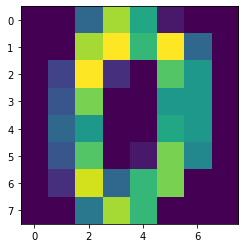

In [13]:
import matplotlib.pyplot as plt
reshaped_arr = X[0].reshape(8,8)
plt.imshow(reshaped_arr)

##To measure performances of a classification algorithm, we need training and test sets
Create train-test splits from the load_digits
dataset


In [14]:
X_train, y_train = X[:-200], y[:-200]
X_test, y_test = X[-200:], y[-200:]

### Many Machine Learning algorithms work better on standardized data
● 0 mean and unit variance

Apply the standard scaler on train and test

● Why haven’t we used the whole dataset?

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###Train a linear regression model on the training set
● We use sklearn LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(solver='lbfgs')
regressor.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
regressor.predict(X_test[0].reshape(1,-1))

array([2])

In [20]:
regressor.score(X_test, y_test)

0.92